# Opening Remarks
## <font color=peru>Welcome to the InfoSec Jupyterthon 2024!</font>

![](media/day1-01_01_banner.gif "Infosec Jupyterthon")

# <font color=dimgray>Roberto Rodriguez</font> <font color=cadetblue>@Cyb3rWard0g</font>

<img src="media/day1-01_02_Roberto.jpg" align="right"/>

* Microsoft Security Research Organization
* I ❤️ Dogs and Open Source!
* Read > Blog > Tweet > Repeat!
* Founder of the Open Threat Research (OTR) Community!
    * https://github.com/OTRF
* Cooking Recipes: https://infosecwelldone.com/ 


# <font color=dimgray>Industry 2024</font>
The bar chart depicting the top 10 industries by participation showcases the sectors most engaged in the event, highlighting where interest or involvement in Jupyter Notebooks within the Infosec community is concentrated.

In [8]:
import pandas as pd
import altair as alt
alt.renderers.enable('default')

df = pd.read_csv("data/InfosecJupyterthon2024-Stats.csv", encoding='ISO-8859-1')  # Adjust encoding if necessary

# Preparing top_10 with clear column names
top_10 = df['Industry'].value_counts().nlargest(10).reset_index()
top_10.columns = ['Industry', 'Count']  # Renaming columns for clarity

# Adjusting Altair chart to align with corrected data preparation
bars = alt.Chart(top_10, title='Top 10 Industries 2024').mark_bar().encode(
    x=alt.X('Count:Q', title='Count'),  # Now referencing 'Count' for the quantitative axis
    y=alt.Y('Industry:N', title='Industry', sort='-x'),  # Referencing 'Industry' for the nominal axis, sorted by count
    color=alt.Color('Industry:N', legend=None)  # Coloring by 'Industry'
).properties(height=350, width=600)

text = bars.mark_text(align='left', baseline='middle', dx=3).encode(
    text='Count:Q'  # Specifying text to display the count
)

# Combining the bar and text layers
chart = bars + text
chart

alt.LayerChart(...)

# <font color=dimgray>Jupyter Notebooks Level 2024</font>
The pie chart visualizing the distribution of 'JupyterNotebookLevel' categories serves to succinctly display the proportion of participants at each proficiency level, enabling a clear understanding of the skill level composition within the dataset.

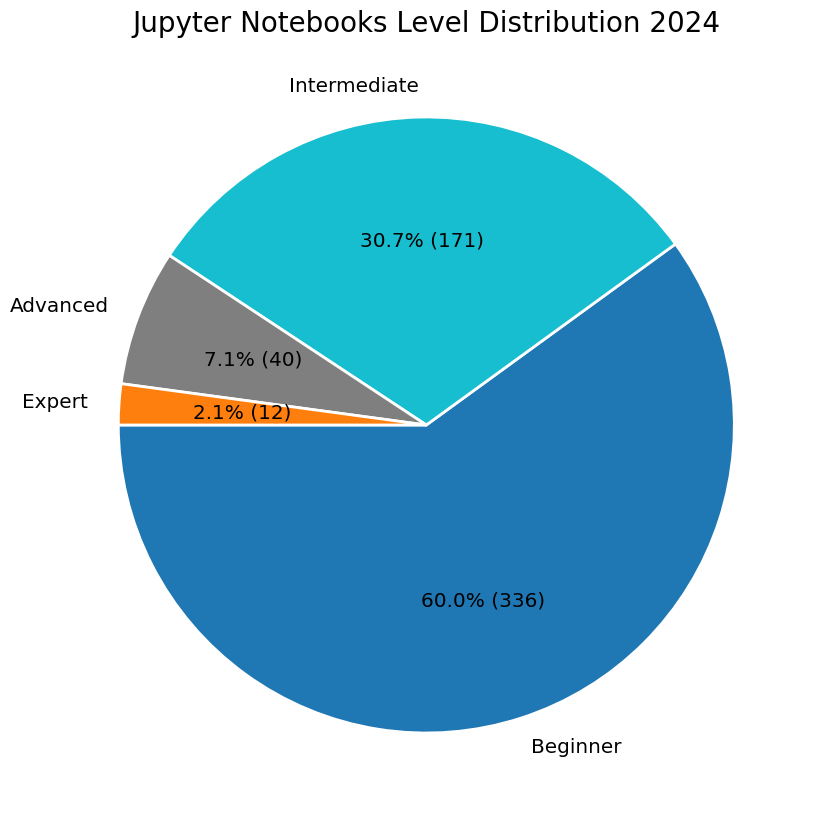

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Loading the dataset
df = pd.read_csv("data/InfosecJupyterthon2024-Stats.csv", encoding='ISO-8859-1')  # Adjust encoding if necessary

# Getting value counts for 'JupyterNotebookLevel'
levels_count = df['JupyterNotebookLevel'].value_counts().reset_index()
levels_count.columns = ['Level', 'Count']  # Renaming columns for clarity

# Defining colors (consider extending this list if there are more than 5 levels)
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red']

# Function for autopct
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}% ({:d})".format(pct, absolute)

# Creating the pie chart
fig, ax = plt.subplots(figsize =(10, 10))
ax.pie(levels_count['Count'], labels=levels_count['Level'], colors=colors,
       autopct=lambda pct: func(pct, levels_count['Count']),
       startangle=180, wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'}, textprops={'size': 'x-large'})

ax.set_title('Jupyter Notebooks Level Distribution 2024', fontsize=20)
plt.show()

# <font color=dimgray>What do you expect to learn about Jupyter Notebooks in this event?</font>
The goal of using a word cloud for visualizing the "Expectations" responses is to quickly identify and illustrate the most common themes and keywords mentioned by participants, highlighting the primary interests or concerns within the dataset in an engaging and easily digestible format.

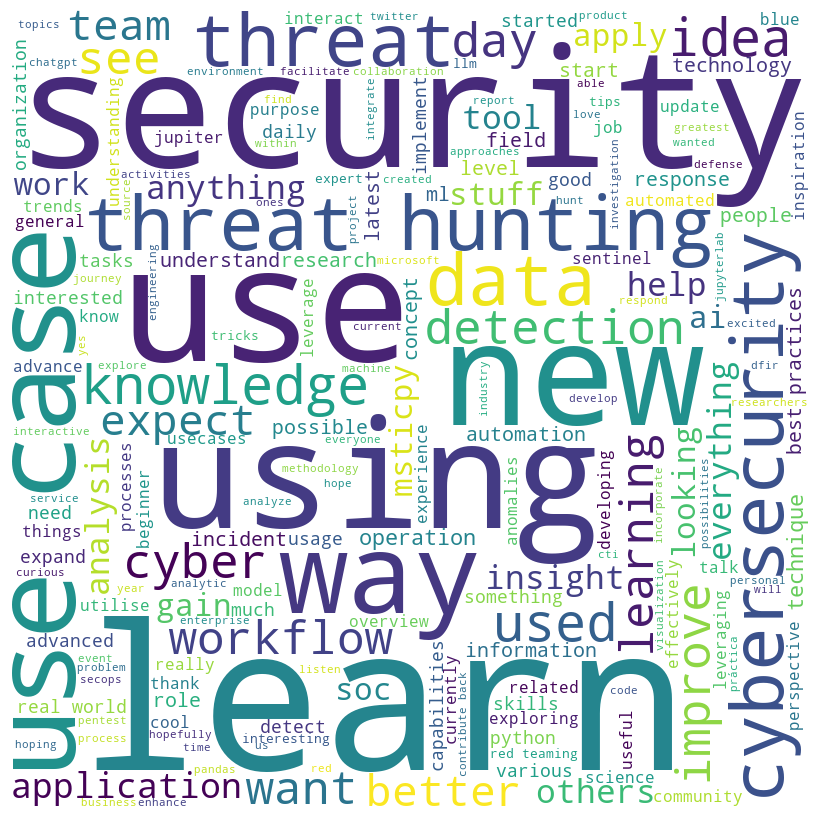

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load the dataset
df = pd.read_csv("data/InfosecJupyterthon2024-Stats.csv", encoding='ISO-8859-1')  # Adjust encoding if necessary

# Extract 'Expectations' column and drop missing values
expectations = df['Expectations'].dropna().values

# Collect tokens from each line, maintaining frequency
tokens = []
for line in expectations:
    tokens.extend(token.lower() for token in str(line).split())

# Join tokens back into a single string
text = " ".join(tokens)

# Update stopwords with domain-specific terms
custom_stopwords = STOPWORDS.union({'notebook', 'notebooks', 'jupyter', 'infosec', 'etc'})

# Generate word cloud
wordcloud = WordCloud(
    width=800, height=800, background_color='white', stopwords=custom_stopwords,
    min_font_size=10
).generate(text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# <font color=dimgray>Housekeeping</font>

**📺 Recordings**
* Today's event is being recorded.
* Subscribe to OTR YouTube Channel: [https://bit.ly/OTRYouTubeSub](https://bit.ly/OTRYouTubeSub)
* YouTube Stream Links:
    * [https://aka.ms/JupyterthonLiveDay1](https://aka.ms/JupyterthonLiveDay1)
    * [https://aka.ms/JupyterthonLiveDay2](https://aka.ms/JupyterthonLiveDay2)

**⏳ Timekeeping**
* **Agenda:** [https://infosecjupyterthon.com/2024/agenda.html](https://infosecjupyterthon.com/2024/agenda.html)
* **Timezone:** Eastern Time (EST)
* **Day 1 (February 15th)**
    * Keynote: 16:10 (EASTERN TIME)
    * Presentations: 16:50 - 21:00 (EASTERN TIME)
* **Day 2 (February 16th)**
    * Keynote: 11:10 (EASTERN TIME)
    * Presentations: 11:50 - 15:00 (EASTERN TIME) 
    * Speakers Panel: 15:00 - 16:00 (EASTERN TIME)

**🎙️ Virtual Conversations**
* OTR Discord Server: [https://aka.ms/JupyterthonDiscord](https://aka.ms/JupyterthonDiscord)
* Public Channel: `jupyterthon`

**👍 Social Media**
* Twitter Handle: [@jupyterthon](https://twitter.com/jupyterthon)
* Hashtag: #infosecjupyterthonon

# <font color=dimgray>Infosec Community!</font>

In [4]:
import pandas as pd
import numpy as np
from opencage.geocoder import OpenCageGeocode
import folium
from folium.plugins import MarkerCluster
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Retrieve the API key from environment variables
key = os.getenv('OPENCAGE_API_KEY')

geocoder = OpenCageGeocode(key)

# Load the dataset
df = pd.read_csv("data/InfosecJupyterthon2024-Stats.csv", encoding='ISO-8859-1')  # Adjust encoding if necessary

# Normalize 'Location' column to lowercase and strip whitespace
df['Location'] = df['Location'].str.lower().str.strip()

# Count the number of members per country, reset index to convert series to DataFrame
members_count = df['Location'].value_counts().reset_index()
members_count.columns = ['Country', 'Members']

# Function to geocode using OpenCage
def geolocate(country):
    try:
        results = geocoder.geocode(country, no_annotations="1")
        if results and len(results):
            lat = results[0]['geometry']['lat']
            lng = results[0]['geometry']['lng']
            return lat, lng
        else:
            return np.nan, np.nan
    except Exception as e:
        return np.nan, np.nan

# Apply geolocation to each country and split the results into two columns ('Latitude', 'Longitude')
members_count[['Latitude', 'Longitude']] = members_count.apply(
    lambda x: geolocate(x['Country']), axis=1, result_type='expand')

# Drop any rows that couldn't be geolocated
members_count.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Create the map
world_map = folium.Map(location=[0, 0], tiles="cartodbpositron", zoom_start=2)
marker_cluster = MarkerCluster().add_to(world_map)

# Add markers to the map
for _, row in members_count.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"Country: {row['Country'].title()}<br>Members: {row['Members']}",
        fill=True
    ).add_to(marker_cluster)

# Display the map
world_map

# <font color=dimgray>https://infosecjupyterthon.com/2024/agenda.html</font>